# Import the training log files

In [205]:
import ast

In [17]:
#log_paths = ['/Users/aurelien/PycharmProjects/spinorhelicity/experiments/npt5-infos/train.log',
 #            '/Users/aurelien/PycharmProjects/spinorhelicity/experiments/npt5/train.log']
#name_exp = ['5pt with IDs - Monomials', '5pt with IDs - Non trivial numerator', '5pt without IDs - Monomials', '5pt without IDs - Non trivial numerator']
#name_exp = ['5pt only scaling IDs - Monomials', '5pt only scaling IDs - Non trivial numerator', '5pt all IDs - Monomials', '5pt all IDs - Non trivial numerator']
name_exp = ['5pt only scaling IDs - Monomials', '5pt only scaling IDs - Non trivial numerator', '5pt no IDs - Monomials', '5pt no IDs - Non trivial numerator']
#name_exp = ['5pt with IDs', '5pt without IDs']

log_paths = ['/Users/aurelien/PycharmProjects/spinorhelicity/experiments/npt5-infos/train.log',
            '/Users/aurelien/PycharmProjects/spinorhelicity/experiments/npt5-infos_c/train.log',
            '/Users/aurelien/PycharmProjects/spinorhelicity/experiments/npt5/train.log',
            '/Users/aurelien/PycharmProjects/spinorhelicity/experiments/npt5_c/train.log']
#name_exp = ['8pt with IDs', '8pt without IDs', '8pt with IDs - combined tokens', '8pt without IDs combined - tokens']

#log_paths = ['/Users/aurelien/PycharmProjects/spinorhelicity/experiments/simplify/train.log']
#name_exp = ["Trig Simplify"]

In [18]:
all_lines = []

for log_path in log_paths:

  logfile = open(log_path, 'r')
  lines = logfile.read().splitlines()
  all_lines.append(lines)
  logfile.close()
    
full_important_lines = []
for lines in all_lines:
  important_lines = []
  for line in lines:
    if '__log__:' in line:
      important_lines.append(ast.literal_eval(line.split('__log__:')[1]))
  full_important_lines.append(important_lines)

### Check that we get the data by reading the final accuracy value

In [19]:
task = 'spin_hel'
full_important_lines[0][0]['test_'+task+'_acc']

0.0

# Plot the Results

In [20]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
#plt.style.use('classic')
plt.style.use('seaborn-whitegrid')

### Accuracy plot as a function of the epoch number

In [21]:
full_epochs = []
full_valid_acc = []
full_test_acc = []

for important_lines in full_important_lines:

  epochs = []
  valid_acc = []
  test_acc = []

  for line in important_lines:
    epochs.append(line['epoch'])
    valid_acc.append(line['valid_'+task+'_acc'])
    test_acc.append(line['test_'+task+'_acc'])
  
  full_epochs.append(epochs)
  full_valid_acc.append(valid_acc)
  full_test_acc.append(test_acc)

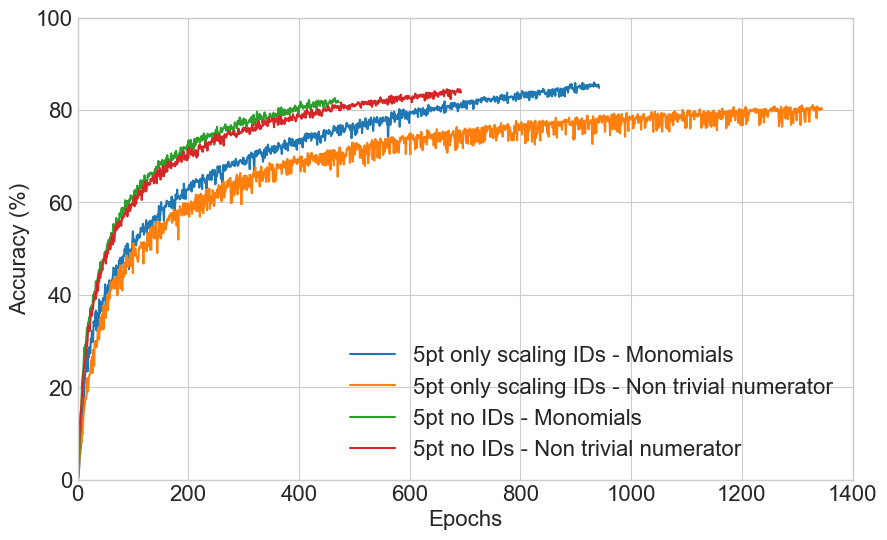

In [23]:
fig, axes = plt.subplots(1,1,figsize=(10,6))
plt.rcParams.update({'font.size': 16}) 
#fig.suptitle('Training accuracy - validation set',fontsize='15')

for i, name in enumerate(name_exp):

  axes.plot(full_epochs[i], full_valid_acc[i], label=name_exp[i])

axes.legend(loc='lower right',fontsize='16')
axes.set_xlabel('Epochs',fontsize='16')
plt.xlim([0, 1400])
plt.ylim([0, 100])
axes.set_ylabel('Accuracy (%)',fontsize='16')
plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt5_exp3/train_accuracy_comp.pdf')
plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt5_exp3/train_accuracy_comp.png')
plt.show()

### Loss plot as a function of the epoch number

In [13]:
full_epochs = []
full_valid_loss = []
full_test_loss = []

for important_lines in full_important_lines:

  epochs = []
  valid_loss = []
  test_loss = []

  for line in important_lines:
    epochs.append(line['epoch'])
    valid_loss.append(line['valid_'+task+'_xe_loss'])
    test_loss.append(line['test_'+task+'_xe_loss'])
  
  full_epochs.append(epochs)
  full_valid_loss.append(valid_loss)
  full_test_loss.append(test_loss)

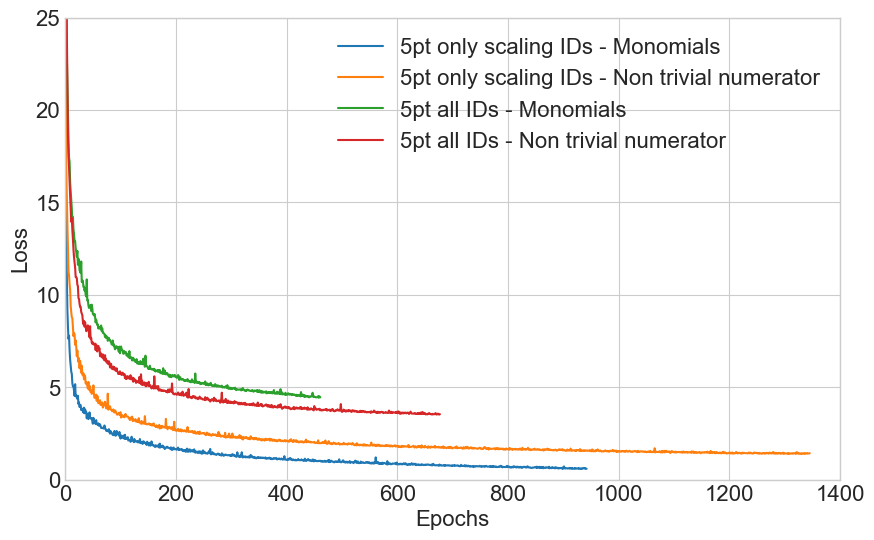

In [14]:
fig, axes = plt.subplots(1,1,figsize=(10,6))
#fig.suptitle('Loss accuracy - validation set',fontsize='15')

for i, name in enumerate(name_exp):

  axes.plot(full_epochs[i], full_valid_loss[i], label=name_exp[i])

axes.legend(loc='upper right',fontsize='16')
axes.set_xlabel('Epochs',fontsize='16')
axes.set_ylabel('Loss',fontsize='16')
plt.xlim([0, 1400])
plt.ylim([0, 25])
plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt5_exp3/train_loss.pdf')
plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt5_exp3/train_loss.png')
plt.show()

### Final accuracy as a function of input length

In [22]:
full_cat_num_valid = []
full_valid_values = []
full_cat_num_test = []
full_test_values = []

for important_lines in full_important_lines:

  cat_num_valid = []
  valid_values = []
  cat_num_test = []
  test_values = []

  for key, value in important_lines[-1].items():
    if 'valid_'+task+'_acc_' in key:
      cat_num_valid.append(int(key.split('valid_'+task+'_acc_')[1]))
      valid_values.append(value)
    
    if 'test_'+task+'_acc_' in key:
      cat_num_test.append(int(key.split('test_'+task+'_acc_')[1]))
      test_values.append(value)
  
  full_cat_num_valid.append(cat_num_valid)
  full_valid_values.append(valid_values)
  full_cat_num_test.append(cat_num_test)
  full_test_values.append(test_values)

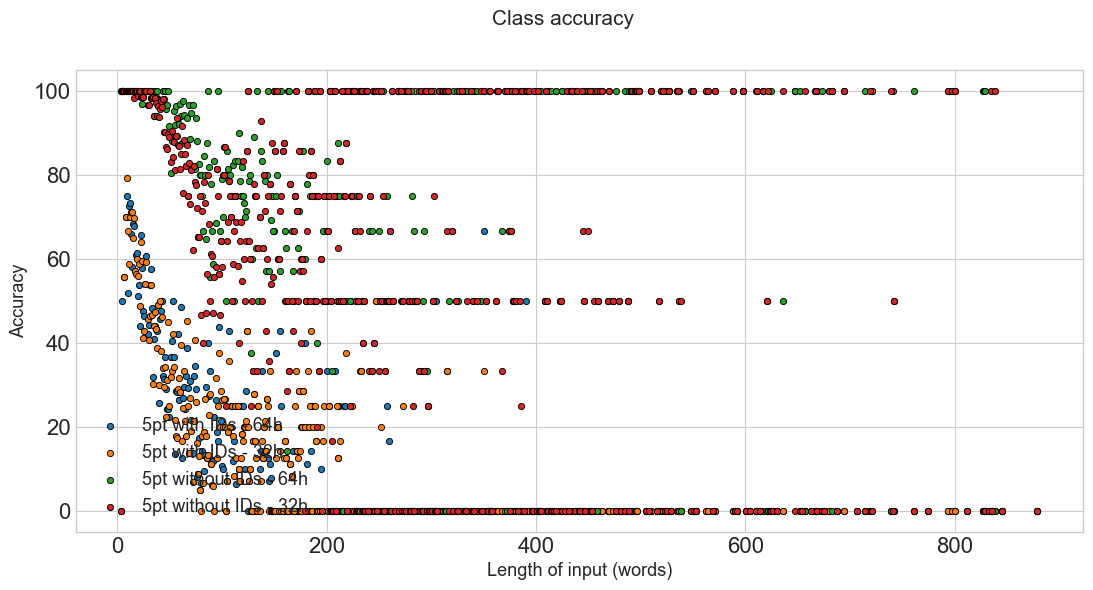

In [23]:
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

fig, axes = plt.subplots(1,1,figsize=(13,6))
fig.suptitle('Class accuracy',fontsize='15')

for i, name in enumerate(name_exp):

  axes.scatter(full_cat_num_valid[i], full_valid_values[i], label=name_exp[i],s=20,edgecolors='black',linewidth=0.65, c= colors[i])

axes.legend(loc='lower left',fontsize='13')
axes.set_xlabel('Length of input (words)',fontsize='13')
axes.set_ylabel('Accuracy',fontsize='13')
plt.show()
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt8_exp1/train_class.pdf')
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt8_exp1/train_class.png')

# Import the evaluation log files

In [98]:
eval_file_num = '/Users/aurelien/PycharmProjects/spinorhelicity/experiments/dumped/Test_eval_spin_hel/npt5-infos_b1n/eval.spin_hel.valid.0'
#eval_file_symb ='/Users/aurelien/PycharmProjects/spinorhelicity/experiments/dumped/Test_eval_spin_hel/npt6-infos_b1n/eval.spin_hel.valid.0'
eval_file_symb= None
eval_path2 = '/Users/aurelien/PycharmProjects/spinorhelicity/experiments/dumped/Test_eval_spin_hel/npt5-infos_b1n/eval.spin_hel.valid.0'
eval_prefix_path = '/Users/aurelien/PycharmProjects/spinorhelicity/experiments/npt5-infos/data.prefix.counts.valid'
name_exp = 'without_ids'
bs = 1
bl = 4

In [206]:
def read_file(log_path):
    if log_path is None:
        return None
    
    all_lines = []
    logfile = open(log_path, 'r')
    lines = logfile.read().splitlines()
    all_lines.append(lines)
    logfile.close()
    
    return all_lines[0]

In [ ]:
eval_lines_num = read_file(eval_file_num)
eval_lines_symb = read_file(eval_file_symb)

In [207]:
def split_into_eq(lines, beam_size, base_length):
    
    if lines is None:
        return None
    
    return [lines[i:i+beam_size+base_length] for i in range(0, len(lines), beam_size+base_length)]

In [ ]:
equations_eval_num = split_into_eq(eval_lines_num, bs, bl)
equations_eval_symb = split_into_eq(eval_lines_symb, bs, bl)

In [101]:
import re
import pandas as pd

def construct_info_equations(equations_list):
    """
    Construct the vector with all of the necessary information regarding the evaluation run
    Length of input/ output / number of scrambles and validity of the hypothesis
    """
    
    if equations_list is None:
        return None
    
    list_info = []
    
    for equation in equations_list:
        dict_info = {}
        dict_info['Eq_ID'] = int(equation[0].split('n ')[1].split(' (')[0])
        dict_info['In_len'] = equation[1].count('ab') + equation[1].count('sb')
        dict_info['Out_len'] = equation[2].split('IDS')[0].count('ab') + equation[2].split('IDS')[0].count('sb')
        #dict_info['Num_IDs'] = equation[2].count('/A') + equation[2].count('/M') + equation[2].count('/S') + equation[2].count('/Z') + equation[2].count('/ID')
        dict_info['Num_IDs'] = equation[2].count('/A') + equation[2].count('/M') + equation[2].count('/S')
        dict_info['Size_inc'] = round((equation[1].count('ab') + equation[1].count('sb'))/(max(equation[2].split('IDS')[0].count('ab') + equation[2].split('IDS')[0].count('sb'), 1)))
        dict_info['Valid'] = int(equation[0].split('/')[0][-1]) * 100
        dict_info['N_pt'] = max([int(eq) for i, eq in enumerate(equation[1]) if eq.isdigit() and equation[1][i-2]=='b'])
        
        list_info.append(dict_info)
    
    return pd.DataFrame.from_records(list_info)


def construct_info_prefix(prefix_list_path):
    
    equations_list = read_file(prefix_list_path)
    
    if equations_list is None:
        return None
    
    list_info = []
    
    for equation in equations_list:
        
        input_eq = equation.split('\t')[0][2:]
        output_eq = equation.split('\t')[1]
        
        dict_info = {}
        dict_info['In_len'] = input_eq.count('ab') + input_eq.count('sb')
        dict_info['Out_len'] = output_eq.split('&')[0].count('ab') + output_eq.split('&')[0].count('sb')
        #dict_info['Num_IDs'] = output_eq.count('A') + output_eq.count('M') + output_eq.count('S') + output_eq.count('Z') + output_eq.count('ID')
        dict_info['Num_IDs'] = output_eq.count('A') + output_eq.count('M') + output_eq.count('S')
        dict_info['Size_inc'] = round((input_eq.count('ab') + input_eq.count('sb'))/(max(output_eq.split('&')[0].count('ab') + output_eq.split('&')[0].count('sb'), 1)))
        dict_info['N_pt'] = max([int(eq) for i, eq in enumerate(input_eq) if eq.isdigit() and input_eq[i-2]=='b'])
        
        list_info.append(dict_info)
    
    return pd.DataFrame.from_records(list_info)


def merge_info(info_num, info_symb):
    """
    Combine the score obtained with symbolic evaluation and numerical evaluation
    """
    if info_symb is None:
        return info_num
    
    else:
        info_num['Valid_symb'] = info_symb['Valid']
        return info_num
    
    
def add_info_ids(info_frame, eval_valid_path=None, prefix_valid_path=None):
    """
    Add the information regarding the number of identities used
    """
    if eval_valid_path is not None:
        eqs_list = split_into_eq(read_file(eval_valid_path), bs, bl)
        num_ids = []
        for equation in eqs_list:
            #num_ids.append(equation[2].count('/A') + equation[2].count('/M') + equation[2].count('/S') + equation[2].count('/Z') + equation[2].count('/ID'))
            num_ids.append(equation[2].count('/A') + equation[2].count('/M') + equation[2].count('/S'))
            
    elif prefix_valid_path is not None:
        eqs_list = read_file(prefix_valid_path)
        num_ids = []
        for equation in eqs_list:
            #num_ids.append(equation.count('A') + equation.count('M') + equation.count('S')+ equation.count('Z') + equation.count('ID'))
            num_ids.append(equation.count('A') + equation.count('M') + equation.count('S'))
    
    else:
        return info_frame
    
    assert info_eq.shape[0] == len(num_ids)
    info_frame['Num_IDs'] = num_ids
    
    return info_frame


In [102]:
info_eq_num = construct_info_equations(equations_eval_num)
info_eq_symb = construct_info_equations(equations_eval_symb)

info_eq = merge_info(info_eq_num, info_eq_symb)

if 'info' not in eval_file_num:
    info_eq = add_info_ids(info_eq, eval_valid_path=eval_path2)

In [103]:
def print_stats(info_frame):
    """
    Print the overall statistics over the evaluation run
    """
    print("Inputs had a mean length of {:0.2f}".format(info_frame['In_len'].mean()))
    print("Outputs had a mean length of {:0.2f}".format(info_frame['Out_len'].mean()))
    print("Inputs had a mean number external momenta of {:0.2f}".format(info_frame['N_pt'].mean()))
    print("Average size increase of {:0.2f}".format(info_frame['Size_inc'].mean()))
    print("We used {:0.2f} identities on average".format(info_frame['Num_IDs'].mean()))
    print("Mean numerical accuracy : {:0.2f} %".format(info_frame['Valid'].mean()))
    
    if 'Valid_symb' in list(info_frame.columns):
            print("Mean symbolic accuracy : {:0.2f} %".format(info_frame['Valid_symb'].mean()))

    
print_stats(info_eq)

Inputs had a mean length of 65.32
Outputs had a mean length of 6.33
Inputs had a mean number external momenta of 5.00
Average size increase of 16.02
We used 2.71 identities on average
Mean numerical accuracy : 85.89 %


In [104]:
import seaborn as sns
import matplotlib.pyplot as plt


def print_accuracy_group(info_frame, column_metric, info_exp=''):
    
    group_frame = info_frame.groupby([column_metric]).mean()
    group_frame.reset_index(inplace=True)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    plt.rcParams.update({'font.size': 18}) 
    plt.style.use('seaborn-whitegrid')
    
    sns.lineplot(data=group_frame, x=column_metric, y='Valid',  linestyle='dashed', marker='o', legend='brief', label='Numerical matching')
    
    if 'Valid_symb' in list(info_frame.columns):
        sns.lineplot(data=group_frame, x=column_metric, y='Valid_symb',  linestyle='dashed', marker='o', legend='brief', label='Symbolic matching')


    
    plt.ylabel("Correct prediction (%)",fontsize=18)
    plt.xlabel(column_metric, fontsize=18)
    plt.ylim([0, 100])
    #plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt5_exp2/{}.pdf'.format(column_metric+info_exp), bbox_inches='tight')
    #plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt5_exp2/{}.png'.format(column_metric+info_exp), bbox_inches='tight')

    plt.show()

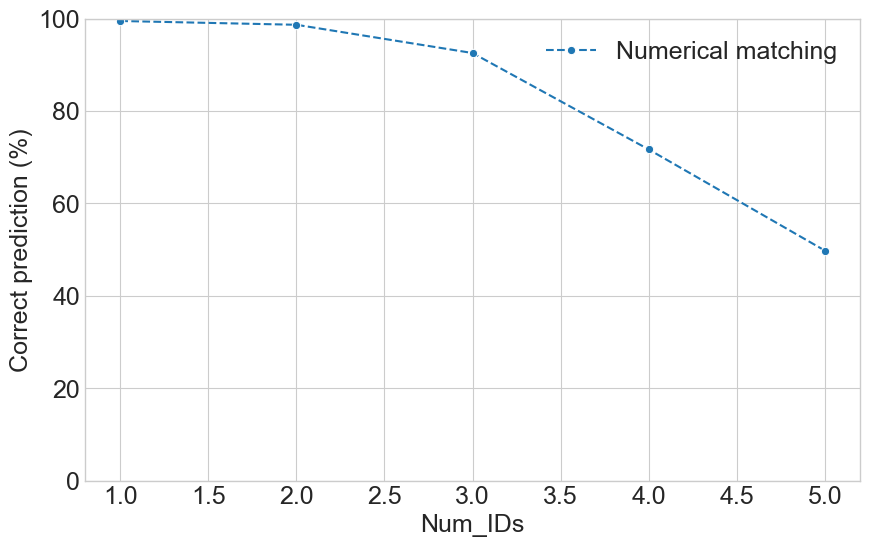

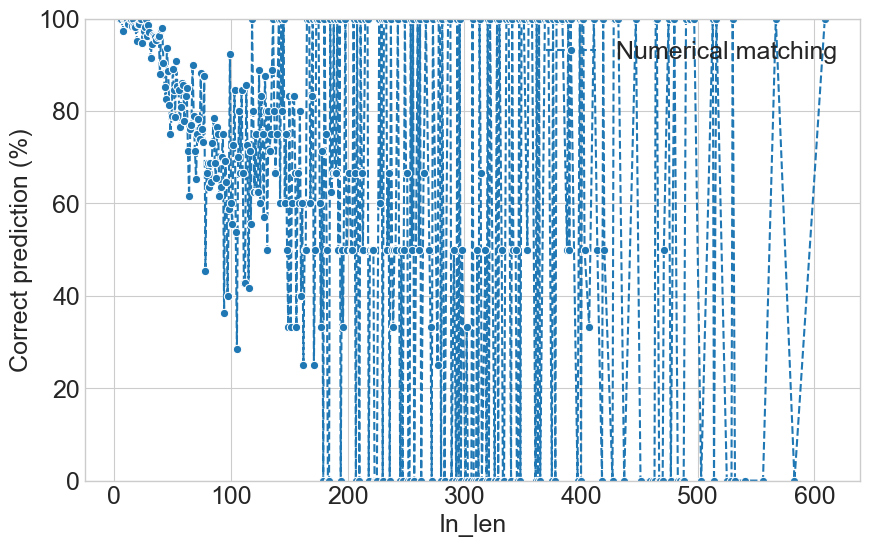

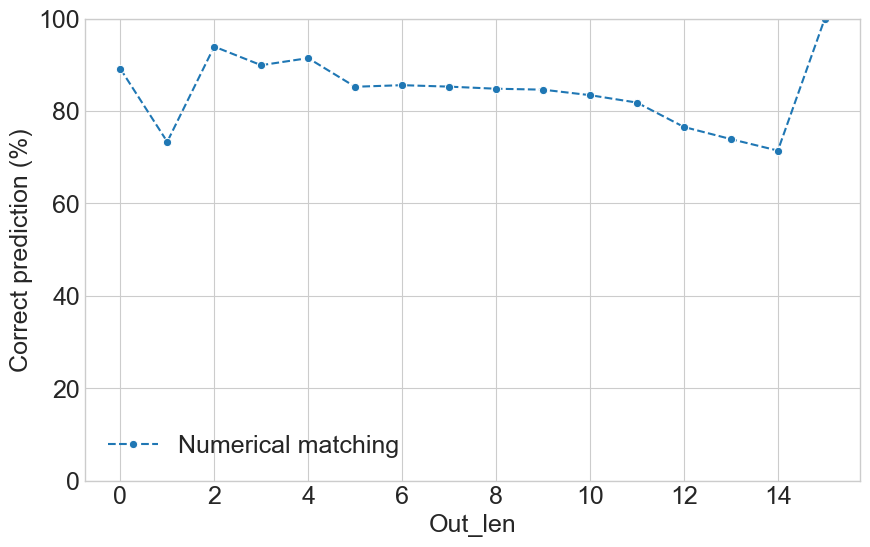

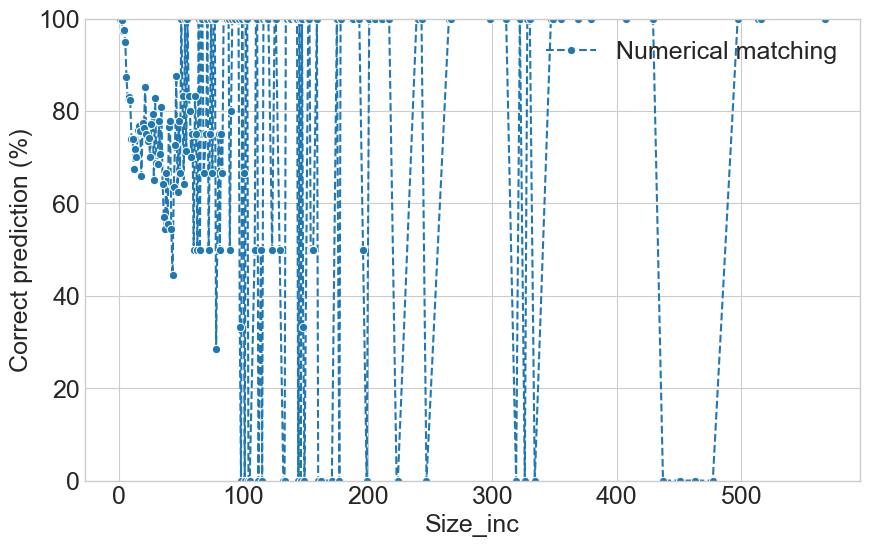

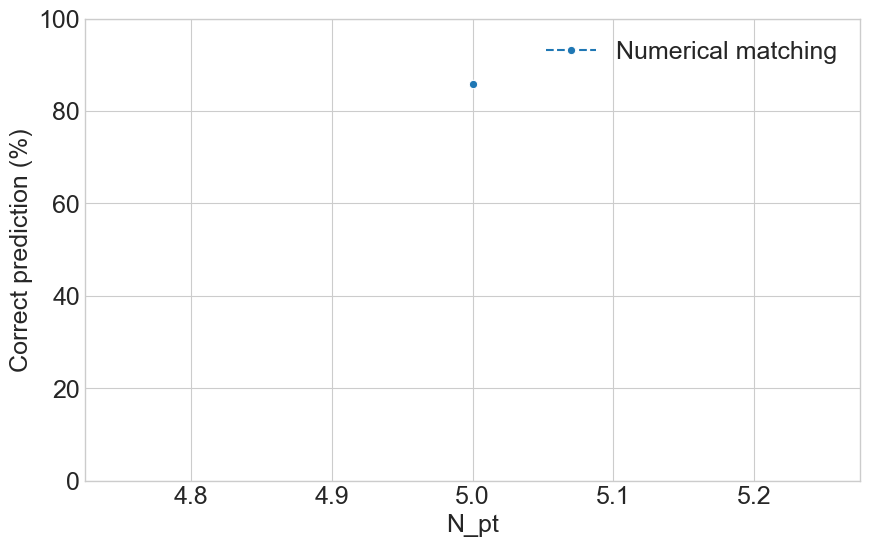

In [105]:
print_accuracy_group(info_eq, 'Num_IDs', info_exp='_' + name_exp)
print_accuracy_group(info_eq, 'In_len', info_exp='_' + name_exp)
print_accuracy_group(info_eq, 'Out_len', info_exp='_' + name_exp)
print_accuracy_group(info_eq, 'Size_inc', info_exp='_' + name_exp)
print_accuracy_group(info_eq, 'N_pt', info_exp='_' + name_exp)

# Details on Evaluation Data

In [82]:
path_prefix_file = '/Users/aurelien/PycharmProjects/spinorhelicity/experiments/npt5-infos_c/data.prefix.counts.valid'
#path_prefix_file = '/Users/aurelien/PycharmProjects/spinorhelicity/experiments/npt5-infos/random_train_sample.counts'
info_eq_summary=construct_info_prefix(path_prefix_file)

#### Can use the previously generated information table

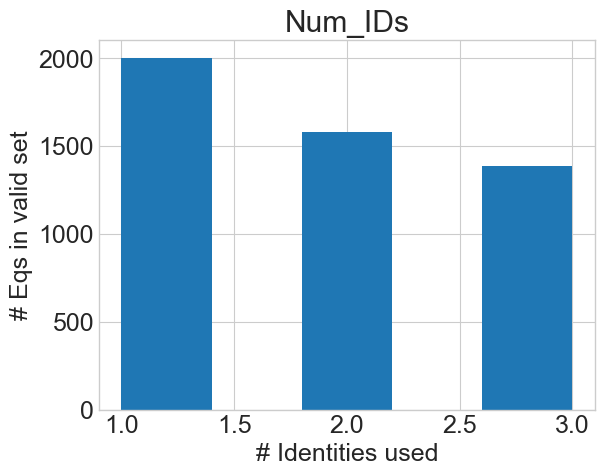

In [83]:
metric = 'Num_IDs'
info_eq_summary.hist(column=[metric], bins=5)
plt.ylabel("# Eqs in valid set",fontsize=18)
plt.xlabel("# Identities used",fontsize=18)

#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt5_exp1/data_{}_random.pdf'.format(metric), bbox_inches='tight')
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt5_exp1/data_{}_random.png'.format(metric), bbox_inches='tight')

plt.show()

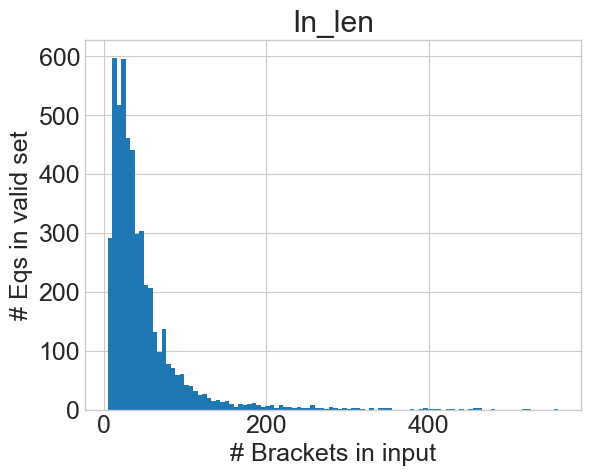

In [84]:
metric = 'In_len'
info_eq_summary.hist(column=[metric], bins=100)
plt.ylabel("# Eqs in valid set",fontsize=18)
plt.xlabel("# Brackets in input",fontsize=18)


#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt5_exp1/data_{}.pdf'.format(metric), bbox_inches='tight')
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt5_exp1/data_{}.png'.format(metric), bbox_inches='tight')


plt.show()

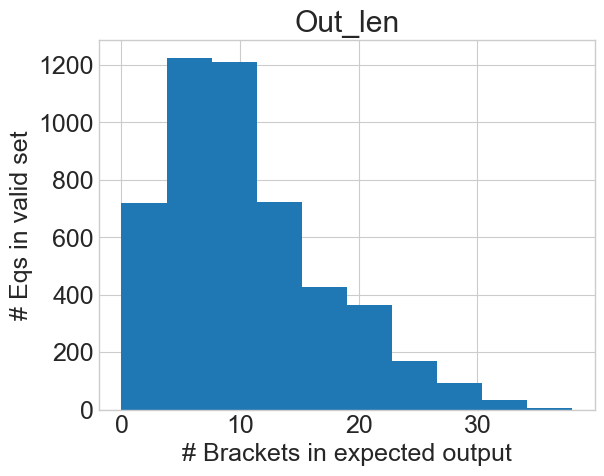

In [85]:
metric = 'Out_len'
info_eq_summary.hist(column=[metric], bins=10)
plt.ylabel("# Eqs in valid set",fontsize=18)
plt.xlabel("# Brackets in expected output",fontsize=18)


#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt5_exp1/data_{}.pdf'.format(metric), bbox_inches='tight')
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt5_exp1/data_{}.png'.format(metric), bbox_inches='tight')


plt.show()

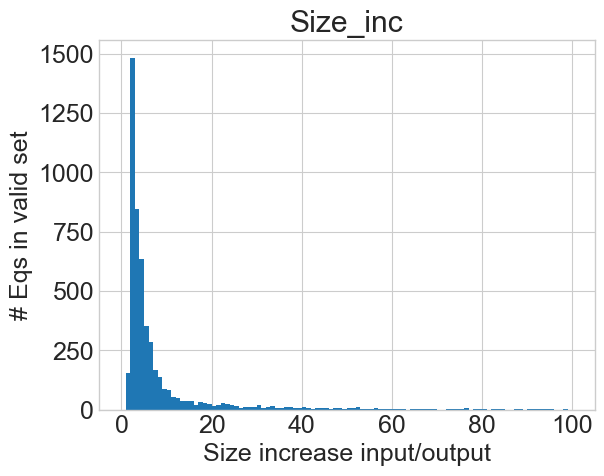

In [86]:
metric = 'Size_inc'
info_eq_summary.hist(column=[metric], bins=100, range=[0, 100])
plt.ylabel("# Eqs in valid set",fontsize=18)
plt.xlabel("Size increase input/output",fontsize=18)


#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt5_exp1/data_{}.pdf'.format(metric), bbox_inches='tight')
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt5_exp1/data_{}.png'.format(metric), bbox_inches='tight')


plt.show()

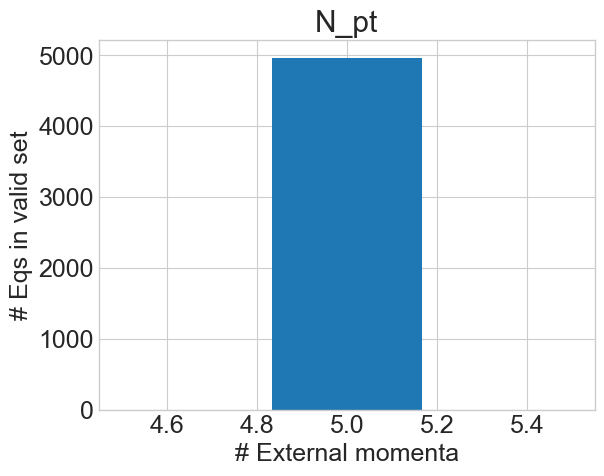

In [87]:
metric = 'N_pt'
info_eq_summary.hist(column=[metric], bins=3)
plt.ylabel("# Eqs in valid set",fontsize=18)
plt.xlabel("# External momenta",fontsize=18)

#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt5_exp1/data_{}.pdf'.format(metric), bbox_inches='tight')
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt5_exp1/data_{}.png'.format(metric), bbox_inches='tight')

plt.show()

### Details on the equations we failed to resolve

Look into detail at the list of failed examples
Try to look at the overlap between two different inference techniques

Since we are looking at a verbose evaluation even on examples solved by the greedy beam search we may miss a couple of examples but probably not more

In [482]:
bs=1
bl=4
eval_path1 = '/Users/aurelien/PycharmProjects/spinorhelicity/experiments/dumped/Test_eval_spin_hel/npt5-combined/eval.spin_hel.valid.0_b1'
eval_lines_num1 = read_file(eval_path1)
equations_eval_num1 = split_into_eq(eval_lines_num1, bs, bl)
equations_info1 = [line[0] for line in equations_eval_num1]

In [483]:
bs=1
eval_path2 = '/Users/aurelien/PycharmProjects/spinorhelicity/experiments/dumped/Test_eval_spin_hel/npt5-combined/eval.spin_hel.valid.0_b1_nucleus'
eval_lines_num2 = read_file(eval_path2)
equations_eval_num2 = split_into_eq(eval_lines_num2, bs, bl)
equations_info2 = [line[0] for line in equations_eval_num2]

In [484]:
import re

def split_valid_sets(equation_infos):
    """
    Given the equation information as 'Equation Eq# (#valid/bs)',
    return two lists, one with the solved eq#'s , one with non solved eq#'s
    """
    solved_list = []
    non_solved_list = []
    
    for eq in equation_infos:
        _, eq_num, solved_info = eq.split(' ')
        eq_num = int(eq_num)
        solved = int(re.split('/|\(|\)', solved_info)[1]) > 0
        
        if solved:
            solved_list.append(eq_num)
        else:
            non_solved_list.append(eq_num)
    
    return solved_list, non_solved_list

In [485]:
bs=20
bl=4
eval_patha = '/Users/aurelien/PycharmProjects/spinorhelicity/experiments/dumped/Test_eval_spin_hel/npt5-combined/eval.spin_hel.valid.0_b20_nucleus'
eval_lines_numa = read_file(eval_patha)
equations_eval_numa = split_into_eq(eval_lines_numa, bs, bl)
equations_infoa = [line[0] for line in equations_eval_numa]
solveda, non_solveda = split_valid_sets(equations_infoa)
print(len(solveda)/(len(solveda)+len(non_solveda)))

0.9529672991522002


In [486]:
len(solveda)

4721

In [487]:
solved1, non_solved1 = split_valid_sets(equations_info1)

In [488]:
len(solved1)/(len(solved1)+len(non_solved1))

0.8784820347194187

In [489]:
solved2, non_solved2 = split_valid_sets(equations_info2)

In [490]:
len(solved2)/(len(solved2)+len(non_solved2))

0.8526443278159064

In [491]:
len(list(set(non_solved1) & set(non_solved2)))

509

In [460]:
len(list(set(solved1) | set(solved2)))

4714

In [461]:
len(list(set(solved1) | set(solved2)))/(len(solved2)+len(non_solved2))

0.9515542995559144

In [449]:
lt=list(set(non_solved1) & set(non_solved2))
lt.sort()

In [401]:
lt

[83,
 201,
 558,
 561,
 580,
 609,
 648,
 704,
 710,
 840,
 1022,
 1068,
 1081,
 1082,
 1140,
 1179,
 1203,
 1216,
 1222,
 1234,
 1274,
 1336,
 1372,
 1630,
 1646,
 1701,
 1721,
 1838,
 1867,
 2008,
 2037,
 2111,
 2126,
 2133,
 2152,
 2177,
 2203,
 2220,
 2289,
 2302,
 2330,
 2338,
 2376,
 2404,
 2414,
 2427,
 2457,
 2514,
 2516,
 2527,
 2538,
 2556,
 2564,
 2576,
 2611,
 2630,
 2665,
 2682,
 2772,
 2784,
 2907,
 2925,
 2998,
 3035,
 3165,
 3176,
 3213,
 3282,
 3347,
 3386,
 3403,
 3441,
 3448,
 3529,
 3643,
 3654,
 3698,
 3725,
 3742,
 3757,
 3770,
 3793,
 3794,
 3825,
 3828,
 3829,
 3890,
 3916,
 3935,
 3936,
 3947,
 3969,
 4036,
 4044,
 4051,
 4054,
 4089,
 4134,
 4136,
 4159,
 4170,
 4175,
 4182,
 4208,
 4235,
 4241,
 4248,
 4254,
 4287,
 4321,
 4334,
 4364,
 4396,
 4398,
 4429,
 4486,
 4549,
 4558,
 4584,
 4600,
 4648,
 4698,
 4709,
 4713,
 4720,
 4790,
 4800,
 4810,
 4820,
 4852,
 4902,
 4914,
 4929]

In [402]:
non_solved1

[1,
 2,
 3,
 4,
 5,
 6,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 19,
 20,
 21,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 35,
 36,
 39,
 40,
 41,
 42,
 43,
 44,
 48,
 49,
 53,
 55,
 56,
 57,
 66,
 69,
 71,
 74,
 77,
 82,
 83,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 100,
 104,
 106,
 107,
 112,
 121,
 126,
 128,
 134,
 135,
 139,
 146,
 167,
 168,
 174,
 176,
 179,
 181,
 185,
 186,
 195,
 196,
 201,
 204,
 207,
 210,
 211,
 219,
 220,
 222,
 224,
 225,
 226,
 232,
 235,
 238,
 243,
 244,
 248,
 250,
 256,
 258,
 265,
 267,
 274,
 276,
 284,
 285,
 286,
 296,
 307,
 310,
 311,
 312,
 314,
 315,
 320,
 321,
 322,
 327,
 329,
 330,
 331,
 332,
 334,
 339,
 340,
 341,
 342,
 345,
 347,
 351,
 365,
 366,
 376,
 377,
 378,
 385,
 397,
 402,
 405,
 408,
 409,
 410,
 411,
 416,
 418,
 425,
 433,
 434,
 443,
 446,
 450,
 454,
 463,
 464,
 467,
 468,
 472,
 478,
 488,
 490,
 493,
 496,
 497,
 500,
 504,
 507,
 508,
 509,
 510,
 513,
 515,
 521,
 525,
 526,
 528,
 530,
 539,
 540

In [135]:
non_solved2

[92,
 117,
 130,
 145,
 177,
 194,
 243,
 269,
 282,
 289,
 308,
 332,
 343,
 345,
 405,
 409,
 424,
 458,
 460,
 498,
 693,
 733,
 833,
 839,
 856,
 898,
 973,
 1031,
 1039,
 1078,
 1101,
 1108,
 1190,
 1210,
 1227,
 1231,
 1265,
 1298,
 1336,
 1341,
 1356,
 1370,
 1377,
 1383,
 1385,
 1466,
 1470,
 1475,
 1482,
 1490,
 1492,
 1493,
 1540,
 1551,
 1563,
 1585,
 1620,
 1664,
 1697,
 1699,
 1735,
 1771,
 1777,
 1782,
 1789,
 1839,
 1896,
 1927,
 1973,
 1981,
 2018,
 2035,
 2081,
 2093,
 2109,
 2117,
 2124,
 2136,
 2141,
 2142,
 2174,
 2212,
 2223,
 2227,
 2245,
 2257,
 2378,
 2383,
 2397,
 2399,
 2403,
 2414,
 2422,
 2424,
 2436,
 2445,
 2454,
 2470,
 2532,
 2541,
 2572,
 2581,
 2592,
 2597,
 2683,
 2695,
 2698,
 2717,
 2734,
 2737,
 2743,
 2764,
 2818,
 2858,
 2874,
 2880,
 2904,
 2905,
 2906,
 2910,
 2914,
 2915,
 2917,
 2922,
 2927,
 3001,
 3038,
 3042,
 3048,
 3103,
 3171,
 3221,
 3281,
 3305,
 3344,
 3356,
 3360,
 3365,
 3366,
 3386,
 3442,
 3481,
 3482,
 3488,
 3489,
 3494,
 3500,

In [136]:
lt2 = list(set(non_solved2)-set(lt))
lt2.sort()

lt2a = list(set(non_solved1)-set(lt))
lt2a.sort()

In [137]:
lt2

[92,
 117,
 130,
 145,
 177,
 243,
 269,
 282,
 343,
 345,
 409,
 733,
 839,
 898,
 973,
 1031,
 1078,
 1101,
 1190,
 1210,
 1231,
 1265,
 1336,
 1341,
 1356,
 1466,
 1470,
 1475,
 1482,
 1490,
 1493,
 1551,
 1563,
 1585,
 1620,
 1664,
 1735,
 1771,
 1777,
 1839,
 1896,
 1927,
 1973,
 2018,
 2035,
 2093,
 2117,
 2124,
 2174,
 2212,
 2257,
 2397,
 2399,
 2414,
 2422,
 2445,
 2454,
 2541,
 2572,
 2581,
 2683,
 2764,
 2818,
 2905,
 2910,
 2917,
 2927,
 3038,
 3042,
 3048,
 3171,
 3344,
 3356,
 3360,
 3366,
 3442,
 3488,
 3494,
 3503,
 3513,
 3529,
 3538,
 3571,
 3583,
 3683,
 3693,
 3832,
 3864,
 3958,
 3971,
 3980,
 4009,
 4070,
 4109,
 4127,
 4166,
 4199,
 4212,
 4236,
 4347,
 4360,
 4419,
 4422,
 4493,
 4541,
 4588,
 4595,
 4629,
 4643,
 4663,
 4689,
 4720,
 4827,
 4844,
 4865,
 4914]

In [138]:
lt2a

[187,
 297,
 457,
 536,
 648,
 658,
 671,
 694,
 782,
 813,
 841,
 962,
 1082,
 1098,
 1129,
 1232,
 1393,
 1539,
 1557,
 1561,
 1608,
 1691,
 1775,
 1778,
 1894,
 1974,
 2046,
 2062,
 2181,
 2266,
 2268,
 2317,
 2334,
 2391,
 2472,
 2515,
 2518,
 2552,
 2609,
 2653,
 2715,
 2716,
 2748,
 2816,
 2862,
 2977,
 3023,
 3024,
 3064,
 3070,
 3118,
 3250,
 3278,
 3322,
 3377,
 3392,
 3465,
 3509,
 3564,
 3646,
 3659,
 3704,
 3750,
 3762,
 3793,
 3800,
 3840,
 3860,
 3882,
 3941,
 4013,
 4115,
 4175,
 4269,
 4367,
 4406,
 4467,
 4475,
 4542,
 4547,
 4591,
 4607,
 4654,
 4727,
 4818,
 4824,
 4830,
 4834,
 4840,
 4843,
 4884,
 4928,
 4932,
 4965]

##### Examples

Example of an equation not solved by nucleus sampling but solved by beam search

Nucleus Sampling

Equation 83 (0/20)
src=(ab12*ab14*ab25*ab35*sb12*sb34**2 - ab12*ab15**2*ab45*sb14*sb15*sb34 + 2*ab13*ab14*ab25*ab35*sb13*sb34**2 - ab13*ab15*ab24*ab35*sb13*sb34**2 + ab13*ab25*ab35*ab45*sb34**2*sb35 + ab14**2*ab25*ab35*sb14*sb34**2 + ab14*ab15*ab25*ab35*sb15*sb34**2 + ab15**2*ab24*ab35*sb15*sb34**2 - ab15**2*ab25*ab34*sb15*sb34**2 - ab15**2*ab25*ab45*sb15*sb34*sb45)/sb45
tgt=-ab13*ab24*ab35*ab45*sb34**3/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 3,
0 -4.547e-02 ab13*ab14*ab25*ab35*sb13*sb34**2/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 3,
0 -4.547e-02 ab13*ab14*ab25*ab35*sb13*sb34**2/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 3,
0 -4.547e-02 ab13*ab14*ab25*ab35*sb13*sb34**2/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 3,
0 -4.547e-02 ab13*ab14*ab25*ab35*sb13*sb34**2/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 3,
0 -5.117e-02 -ab13*ab14*ab25*ab35*sb13*sb34**2/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 3,
0 -5.117e-02 -ab13*ab14*ab25*ab35*sb13*sb34**2/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 3,
0 -5.117e-02 -ab13*ab14*ab25*ab35*sb13*sb34**2/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 3,
0 -5.117e-02 -ab13*ab14*ab25*ab35*sb13*sb34**2/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 3,
0 -5.117e-02 -ab13*ab14*ab25*ab35*sb13*sb34**2/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 3,
0 -5.117e-02 -ab13*ab14*ab25*ab35*sb13*sb34**2/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 3,
0 -5.117e-02 -ab13*ab14*ab25*ab35*sb13*sb34**2/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 3,
0 -8.890e-02 0: Scaling : MD: 0/ LG: p1: 0,p2: 0,p3: 0,p4: 0,p5: 0,
0 -8.890e-02 0: Scaling : MD: 0/ LG: p1: 0,p2: 0,p3: 0,p4: 0,p5: 0,
0 -8.890e-02 0: Scaling : MD: 0/ LG: p1: 0,p2: 0,p3: 0,p4: 0,p5: 0,
0 -8.890e-02 0: Scaling : MD: 0/ LG: p1: 0,p2: 0,p3: 0,p4: 0,p5: 0,
0 -9.926e-02 -ab12*ab13*ab35*ab45*sb13*sb34**2/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 3,
0 -1.041e-01 ab12*ab13*ab35*ab45*sb13*sb34**2/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 3,
0 -1.229e-01 ab14**2*ab25*ab35*sb14*sb34**2/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 3,
0 -1.751e-01 ab14*ab23*ab25*ab35*sb23*sb34**2/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 3,
0 -1.953e-01 ab12*ab35*ab45**2*sb34**2: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 3,


Beam Search
Equation 83 (2/20)
src=(ab12*ab14*ab25*ab35*sb12*sb34**2 - ab12*ab15**2*ab45*sb14*sb15*sb34 + 2*ab13*ab14*ab25*ab35*sb13*sb34**2 - ab13*ab15*ab24*ab35*sb13*sb34**2 + ab13*ab25*ab35*ab45*sb34**2*sb35 + ab14**2*ab25*ab35*sb14*sb34**2 + ab14*ab15*ab25*ab35*sb15*sb34**2 + ab15**2*ab24*ab35*sb15*sb34**2 - ab15**2*ab25*ab34*sb15*sb34**2 - ab15**2*ab25*ab45*sb15*sb34*sb45)/sb45
tgt=-ab13*ab24*ab35*ab45*sb34**3/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 3,
0 -4.547e-02 ab13*ab14*ab25*ab35*sb13*sb34**2/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 3,
0 -8.890e-02 0: Scaling : MD: 0/ LG: p1: 0,p2: 0,p3: 0,p4: 0,p5: 0,
0 -1.041e-01 ab12*ab13*ab35*ab45*sb13*sb34**2/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 3,
0 -1.079e-01 ab12*ab14*ab25*ab35*sb12*sb34**2/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 3,
0 -1.229e-01 ab14**2*ab25*ab35*sb14*sb34**2/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 3,
0 -1.307e-01 ab14*ab15*ab23*ab35*sb13*sb34**2/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 3,
0 -1.421e-01 ab12*ab14*ab35*ab45*sb14*sb34**2/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 3,
0 -1.425e-01 ab13*ab24*ab35*ab45*sb34**3/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 3,
1 -1.455e-01 -ab13*ab24*ab35*ab45*sb34**3/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 3,
0 -1.491e-01 ab13*ab15*ab24*ab35*sb13*sb34**2/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 3,
0 -1.495e-01 ab13*ab14*ab25**2*sb12*sb34**2/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 3,
0 -1.562e-01 ab13**2*ab25*ab45*sb13*sb34**2/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 3,
0 -1.953e-01 ab12*ab35*ab45**2*sb34**2: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 3,
0 -2.032e-01 ab14*ab25*ab35*ab45*sb34**2: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 3,
0 -4.987e-01 ab13*ab14*ab25*ab35*sb13*sb34**2/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -2,p4: 0,p5: 3,
0 -5.630e-01 ab13*ab14*ab25**2*sb12*sb34**2/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 2,
0 -5.809e-01 -ab13*ab14*ab25*ab35*sb13*sb34**2/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,
0 -5.924e-01 ab14**2*ab25*ab35*sb14*sb34**2/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 2,
1 -6.276e-01 -ab13*ab24*ab35*ab45*sb34**3/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,p5: 2,
0 -6.357e-01 -ab12*ab13*ab35*ab45*sb13*sb34**2/sb45: Scaling : MD: 6/ LG: p1: 1,p2: 1,p3: -1,p4: 0,

Example of an equation not solved by beam search but solved by  nucleus sampling

Nucleus Sampling
Equation 193 (8/20)
src=(ab13*ab14**2*ab35**2*ab45**2*sb12*sb13*sb23*sb25**3 - ab14**2*ab15*ab34*ab35*ab45**2*sb12*sb14*sb23*sb25**3 + ab14**2*ab23*ab35**2*ab45**2*sb12*sb23**2*sb25**3 - ab14**2*ab25*ab34*ab35*ab45**2*sb12*sb23*sb24*sb25**3 - ab14**2*ab34*ab35**2*ab45**2*sb12*sb23*sb25**3*sb34 + ab14**2*ab35**3*ab45**2*sb12*sb23*sb25**3*sb35)/sb34
tgt=-ab14**2*ab34*ab35**2*ab45**2*sb12*sb23*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -5,p3: 2,p4: 5,p5: 1,
0 -1.674e-02 ab14**2*ab34*ab35**2*ab45**2*sb12*sb23*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -5,p3: 2,p4: 5,p5: 1,
0 -1.674e-02 ab14**2*ab34*ab35**2*ab45**2*sb12*sb23*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -5,p3: 2,p4: 5,p5: 1,
0 -1.674e-02 ab14**2*ab34*ab35**2*ab45**2*sb12*sb23*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -5,p3: 2,p4: 5,p5: 1,
0 -1.674e-02 ab14**2*ab34*ab35**2*ab45**2*sb12*sb23*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -5,p3: 2,p4: 5,p5: 1,
0 -1.674e-02 ab14**2*ab34*ab35**2*ab45**2*sb12*sb23*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -5,p3: 2,p4: 5,p5: 1,
0 -1.674e-02 ab14**2*ab34*ab35**2*ab45**2*sb12*sb23*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -5,p3: 2,p4: 5,p5: 1,
0 -1.674e-02 ab14**2*ab34*ab35**2*ab45**2*sb12*sb23*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -5,p3: 2,p4: 5,p5: 1,
0 -1.674e-02 ab14**2*ab34*ab35**2*ab45**2*sb12*sb23*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -5,p3: 2,p4: 5,p5: 1,
0 -1.674e-02 ab14**2*ab34*ab35**2*ab45**2*sb12*sb23*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -5,p3: 2,p4: 5,p5: 1,
0 -1.674e-02 ab14**2*ab34*ab35**2*ab45**2*sb12*sb23*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -5,p3: 2,p4: 5,p5: 1,
1 -1.938e-02 -ab14**2*ab34*ab35**2*ab45**2*sb12*sb23*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -5,p3: 2,p4: 5,p5: 1,
1 -1.938e-02 -ab14**2*ab34*ab35**2*ab45**2*sb12*sb23*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -5,p3: 2,p4: 5,p5: 1,
1 -1.938e-02 -ab14**2*ab34*ab35**2*ab45**2*sb12*sb23*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -5,p3: 2,p4: 5,p5: 1,
1 -1.938e-02 -ab14**2*ab34*ab35**2*ab45**2*sb12*sb23*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -5,p3: 2,p4: 5,p5: 1,
1 -1.938e-02 -ab14**2*ab34*ab35**2*ab45**2*sb12*sb23*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -5,p3: 2,p4: 5,p5: 1,
1 -1.938e-02 -ab14**2*ab34*ab35**2*ab45**2*sb12*sb23*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -5,p3: 2,p4: 5,p5: 1,
1 -1.938e-02 -ab14**2*ab34*ab35**2*ab45**2*sb12*sb23*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -5,p3: 2,p4: 5,p5: 1,
1 -1.938e-02 -ab14**2*ab34*ab35**2*ab45**2*sb12*sb23*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -5,p3: 2,p4: 5,p5: 1,
0 -1.771e-01 0: Scaling : MD: 0/ LG: p1: 0,p2: 0,p3: 0,p4: 0,p5: 0,
0 -1.771e-01 0: Scaling : MD: 0/ LG: p1: 0,p2: 0,p3: 0,p4: 0,p5: 0,



Beam Search 
Equation 193 (0/20)
src=(ab13*ab14**2*ab35**2*ab45**2*sb12*sb13*sb23*sb25**3 - ab14**2*ab15*ab34*ab35*ab45**2*sb12*sb14*sb23*sb25**3 + ab14**2*ab23*ab35**2*ab45**2*sb12*sb23**2*sb25**3 - ab14**2*ab25*ab34*ab35*ab45**2*sb12*sb23*sb24*sb25**3 - ab14**2*ab34*ab35**2*ab45**2*sb12*sb23*sb25**3*sb34 + ab14**2*ab35**3*ab45**2*sb12*sb23*sb25**3*sb35)/sb34
tgt=-ab14**2*ab34*ab35**2*ab45**2*sb12*sb23*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -5,p3: 2,p4: 5,p5: 1,
0 -1.674e-02 ab14**2*ab34*ab35**2*ab45**2*sb12*sb23*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -5,p3: 2,p4: 5,p5: 1,
0 -1.237e-01 ab14**2*ab34*ab35*ab45**2*sb12*sb23*sb24*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -5,p3: 1,p4: 4,p5: 0,
0 -1.245e-01 -ab14**2*ab34*ab35*ab45**2*sb12*sb23*sb24*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -5,p3: 1,p4: 4,p5: 0,
0 -1.587e-01 -ab14**2*ab34*ab35*ab45**2*sb12*sb23*sb24*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -5,p3: 1,p4: 4,p5: 1,
0 -1.642e-01 ab14**2*ab15*ab34*ab35*ab45**2*sb12*sb15*sb23*sb25**3: Scaling : MD: (3)+(10)/ LG: p1: 1,p2: -5,p3: 1,p4: 5,p5: 1,
0 -1.648e-01 -ab14**2*ab15*ab34*ab35*ab45**2*sb12*sb23*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -5,p3: 1,p4: 5,p5: 1,
0 -1.672e-01 -ab14**2*ab15*ab34*ab35*ab45**2*sb12*sb23*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -5,p3: 2,p4: 5,p5: 1,
0 -1.672e-01 ab14**2*ab34*ab35*ab45**2*sb12*sb23*sb24*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -6,p3: 1,p4: 4,p5: 0,
0 -1.681e-01 ab14**2*ab34*ab35*ab45**2*sb12*sb23*sb24*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -5,p3: 1,p4: 5,p5: 0,
0 -1.701e-01 ab14**2*ab15*ab34*ab35*ab45**2*sb12*sb15*sb23*sb25**3: Scaling : MD: (3)+(10)/ LG: p1: 1,p2: -5,p3: 2,p4: 5,p5: 1,
0 -1.717e-01 -ab14**2*ab34*ab35*ab45**2*sb12*sb23*sb24*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -5,p3: 1,p4: 5,p5: 0,
0 -1.721e-01 ab14**2*ab15*ab34*ab35*ab45**2*sb12*sb15*sb23*sb25**3: Scaling : MD: (3)+(10)/ LG: p1: 1,p2: -5,p3: 1,p4: 5,p5: 0,
0 -1.740e-01 ab14**2*ab34*ab35*ab45**2*sb12*sb23*sb24*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -5,p3: 1,p4: 4,p5: 1,
0 -1.759e-01 -ab14**2*ab34*ab35*ab45**2*sb12*sb23*sb24*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -6,p3: 1,p4: 4,p5: 0,
0 -1.768e-01 ab14**2*ab15*ab34*ab35*ab45**2*sb12*sb15*sb23*sb25**3: Scaling : MD: (3)+(10)/ LG: p1: 1,p2: -5,p3: 2,p4: 5,p5: 0,
0 -1.771e-01 0: Scaling : MD: 0/ LG: p1: 0,p2: 0,p3: 0,p4: 0,p5: 0,
0 -1.786e-01 -ab14**2*ab34*ab35*ab45**2*sb12*sb23*sb24*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -5,p3: 2,p4: 4,p5: 0,
0 -1.835e-01 ab14**2*ab34*ab35**2*ab45**2*sb12*sb23*sb25**3: Scaling : MD: (3)+(10)/ LG: p1: 1,p2: -5,p3: 2,p4: 5,p5: 1,
0 -1.936e-01 ab14**2*ab34*ab35*ab45**2*sb12*sb23*sb24*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -5,p3: 2,p4: 4,p5: 0,
0 -2.050e-01 -ab14**2*ab34*ab35*ab45**2*sb12*sb23*sb24*sb25**3: Scaling : MD: (2)+(10)/ LG: p1: 1,p2: -5,p3: 1,p4: 5,p5: 1,